**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | iris_dataset.csv |
| Goal     | Perform clustering for Iris dataset using Spark data processing system. |

# **What is Spark?**

Spark, or Apache Spark, is an **open-source distributed computing system designed for big data processing and analytics**. It provides a unified and flexible framework for processing large-scale data sets across multiple computers or clusters. Spark is written in Scala but provides APIs in multiple programming languages, including Java, Python, and R. It has gained popularity due to its speed, scalability, and ability to process diverse workloads efficiently. Spark has been widely adopted in industries and research fields where large-scale data processing, real-time analytics, and machine learning are required.

# **What is JDK?**

JDK stands for **Java Development Kit**, while OpenJDK refers to the open-source implementation of the Java Development Kit. OpenJDK is a collaborative project, primarily led by Oracle, that involves contributions from individuals and organizations within the Java community. OpenJDK provides an open and transparent platform for the development of Java-related technologies. OpenJDK aims to provide a free and open alternative to the proprietary JDK. It includes the same essential components as the JDK, such as the Java compiler, runtime libraries, and development tools. OpenJDK adheres to the Java SE (Standard Edition) specifications and is used as the reference implementation for Java. In summary, JDK is the Java Development Kit provided by Oracle, while OpenJDK is the open-source implementation of the JDK, maintained by a collaborative community effort. OpenJDK provides a free and open alternative for Java development and serves as the foundation for various JDK distributions, including Oracle JDK.

---

# **START**

---

# **Spark Installation**

**Spark Version :** 3.4.0 (Latest Version)

<br>

**JDK Version :** OpenJDK 8

<small>*OpenJDK = Open-Source Java Development Kit</small>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
!tar xf spark-3.4.0-bin-hadoop3.tgz
!pip install -q findspark

# **Set Environment Variable**

**Setting variable for the Operating Systems environment**

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

# **Spark Initialization**

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# **Import Libraries**

In [ ]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn
from pyspark.ml.clustering import KMeans

# **Import Dataset**

In [ ]:
df = spark.read.csv('iris_dataset.csv',inferSchema=True,header=True)

# **Data Preprocessing**

**Dataset Shape**

In [ ]:
print((df.count(),len(df.columns)))

(150, 5)


**Dataset Columns**

In [ ]:
df.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

**Dataset Data Structures**

In [ ]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



**Show Dataset**

In [ ]:
df.orderBy(rand()).show(10,False)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|species   |
+------------+-----------+------------+-----------+----------+
|5.0         |3.5        |1.3         |0.3        |setosa    |
|5.9         |3.0        |4.2         |1.5        |versicolor|
|6.3         |2.9        |5.6         |1.8        |virginica |
|6.6         |3.0        |4.4         |1.4        |versicolor|
|5.0         |2.0        |3.5         |1.0        |versicolor|
|7.9         |3.8        |6.4         |2.0        |virginica |
|5.6         |2.7        |4.2         |1.3        |versicolor|
|4.9         |3.1        |1.5         |0.1        |setosa    |
|5.9         |3.2        |4.8         |1.8        |versicolor|
|5.8         |4.0        |1.2         |0.2        |setosa    |
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



**How Much Iris Species in the Dataset**

In [ ]:
df.select('species').distinct().count()

3

**Count of each Species**

In [ ]:
df.groupBy('species').count().orderBy('count',ascending=False).show(10,False)

+----------+-----+
|species   |count|
+----------+-----+
|virginica |50   |
|versicolor|50   |
|setosa    |50   |
+----------+-----+



**Columns Mapping**

In [ ]:
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

**Changing all Features / Columns into Vectors using VectorAssembler()**

In [ ]:
from pyspark.ml.feature import VectorAssembler
vec_assembler = VectorAssembler(inputCols = input_cols, outputCol='features')
final_data = vec_assembler.transform(df)

# **Perform Clustering**

**Perform Clustering using KMeans algorithm and Showing the Square Distance of each Clusters**

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

errors=[]

for k in range(2,10):
  kmeans = KMeans(featuresCol = 'features', k=k)
  model = kmeans.fit(final_data)
  predict = model.transform(final_data)
  jarak = ClusteringEvaluator().evaluate(predict)
  errors.append(jarak)
  print("K={}".format(k))
  print("Square Distance = " + str(jarak))
  print('--'*30)

K=2
Square Distance = 0.8501515983265806
------------------------------------------------------------
K=3
Square Distance = 0.7342113066202725
------------------------------------------------------------
K=4
Square Distance = 0.6720731409257744
------------------------------------------------------------
K=5
Square Distance = 0.6068001254606574
------------------------------------------------------------
K=6
Square Distance = 0.6368034458217438
------------------------------------------------------------
K=7
Square Distance = 0.5059222856494507
------------------------------------------------------------
K=8
Square Distance = 0.5357075792393957
------------------------------------------------------------
K=9
Square Distance = 0.6227557716383895
------------------------------------------------------------


**Clusters Visualization**

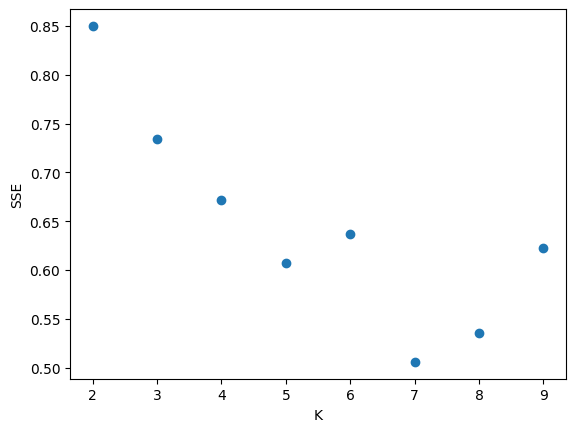

In [ ]:
cluster_number = range(2,10)
plt.scatter(cluster_number,errors)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

**For Example, we choose K = 3 to perform KMeans Clustering**

<small>*For now, we don't use Elbow Method to find the best K because this project is just a training</small>

In [ ]:
kmeans = KMeans(featuresCol = 'features', k=3)

**Train the Model (KMeans Clustering Algorithm)**

In [ ]:
model = kmeans.fit(final_data)

**Checking the Clusters that is resulted from KMeans cluster prediction**

In [ ]:
model.transform(final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   50|
|         2|   39|
|         0|   61|
+----------+-----+



**Predict Clusters**

In [ ]:
predictions=model.transform(final_data)

# **Evaluation**

**Prediction Result Columns**

In [ ]:
predictions.columns

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'features',
 'prediction']

**Cluster Prediction Results**

In [ ]:
predictions.groupBy('species', 'prediction').count().show()

+----------+----------+-----+
|   species|prediction|count|
+----------+----------+-----+
| virginica|         2|   36|
| virginica|         0|   14|
|versicolor|         0|   47|
|    setosa|         1|   50|
|versicolor|         2|    3|
+----------+----------+-----+



**Checking the Data**

In [ ]:
pandas_df = predictions.toPandas()
pandas_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,features,prediction
0,5.1,3.5,1.4,0.2,setosa,"[5.1, 3.5, 1.4, 0.2]",1
1,4.9,3.0,1.4,0.2,setosa,"[4.9, 3.0, 1.4, 0.2]",1
2,4.7,3.2,1.3,0.2,setosa,"[4.7, 3.2, 1.3, 0.2]",1
3,4.6,3.1,1.5,0.2,setosa,"[4.6, 3.1, 1.5, 0.2]",1
4,5.0,3.6,1.4,0.2,setosa,"[5.0, 3.6, 1.4, 0.2]",1


**Create Mapping to Encode (convert text to numeric)**

In [ ]:
mapping = {'versicolor':2,'virginica':0,'setosa':1}
hasil = [ mapping[x] for x in pandas_df.species]

**Checking the Count of Predictions Failures**

<small>*Predictions Failures = The Prediction Values are not the same as the Actual Values</small>

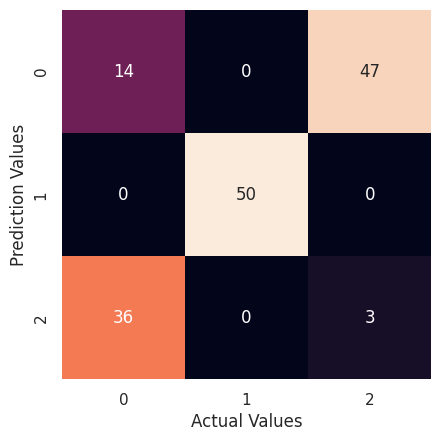

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
mat = confusion_matrix(hasil, pandas_df.prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Actual Values')
plt.ylabel('Prediction Values');

**Predictions Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :", accuracy_score(hasil, pandas_df.prediction))

Accuracy Score : 0.44666666666666666
